In [1]:
import geopandas as gpd
import rasterio
from rasterio.features import geometry_mask
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load Nepal boundaries
nepal_shapefile_path = 'innershpfiles/'  # Replace with the actual path to your Nepal shapefile
nepal_boundary = gpd.read_file(nepal_shapefile_path)


district_name = 'DHANUSHA'
district_boundary = nepal_boundary[nepal_boundary['DISTRICT'] == district_name]



In [2]:
# Load elevation GeoTIFF
elevation_tif_path = 'dem_nepal.tif'  # Replace with the actual path to your GeoTIFF file
elevation_data = rasterio.open(elevation_tif_path)

In [4]:
# Clip elevation data to district boundaries
district_mask = geometry_mask(district_boundary.geometry, out_shape=elevation_data.shape, transform=elevation_data.transform, invert=True)
elevation_data_masked = np.ma.masked_array(elevation_data.read(1), ~district_mask)

In [7]:
# Get highest elevation point within the district
max_elevation = elevation_data_masked.max()
max_elevation_index = np.unravel_index(np.argmax (elevation_data_masked), elevation_data_masked.shape)
max_elevation_coordinates = rasterio.transform.xy(elevation_data.transform, max_elevation_index[0], max_elevation_index[1])


In [8]:
# Print results
print(f'Highest elevation within {district_name} district: {max_elevation} meters')
print(f'Coordinates of the highest elevation point: {max_elevation_coordinates}')

Highest elevation within DHANUSHA district: 707 meters
Coordinates of the highest elevation point: (85.921397826961, 27.128673645935997)


In [9]:
point = Point(max_elevation_coordinates)
for index,row in district_boundary.iterrows():
    if row['geometry'].contains(point):
        print(row['GaPa_NaPa'])

Mithila


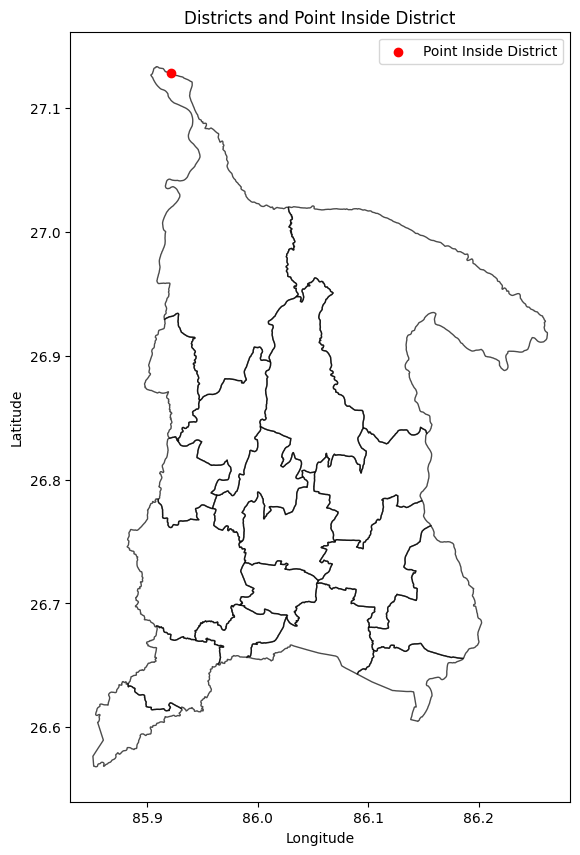

In [10]:
# Plotting the district boundary and the highest elevation point
fig, ax = plt.subplots(figsize=(10, 10))
district_boundary.plot(ax=ax, edgecolor='black', facecolor='none', alpha=0.7)

# Plotting the point
ax.scatter(*max_elevation_coordinates, color='red', marker='o', label='Point Inside District')

# Adding labels and legend
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Districts and Point Inside District')
ax.legend()
ax.legend()

# Show the plot
plt.show()